# San Francisco Bay Area Bike-sharing System Visualization
## by Mahmoud Fawzy

## Preliminary Wrangling

> Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay, and San Jose. In this investigation, we will discover some facts and patterns within the data provided to understand the users and their behaviors.


>This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in February 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import datetime

%matplotlib inline

In [2]:
# Read the csv file, and check its top 10 rows
Bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')
print(Bike_df.shape)
Bike_df.head(10)

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [3]:
# check for NaN values in each row
Bike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [4]:
# check the number of unique values in each cloumn
Bike_df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [5]:
# check for dublicated rows 
sum(Bike_df.duplicated()) 

0

### What is the structure of your dataset?

> The Table contains 183412 row/indvidual trips and 16 column/property for each trip 
the columns shows properties about the starting station - ending station - member - some other trip info.

> station properties are (id - name - latitude - longitude)

> member properties are (user_type - member_birth_year - member_gender)

> other trip info are (duration_sec - start_time - end_time - bike_id - bike_share_for_all_trip)

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in the timing and stations position and the relation between them and the other properties.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> of course the start and end time of each trip ond the station id will be the main features to use. but also the data about each traveller like the type and gender will be useful  

## Univariate Exploration


### let's check the first column. the duaration.

In [6]:
# Generating data to be plotted 

Bike_df['duration_min'] = Bike_df['duration_sec']/60

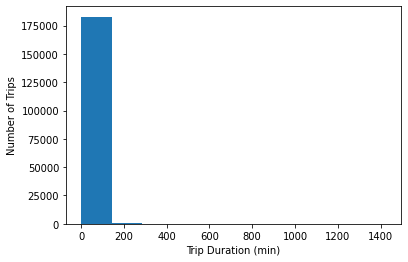

In [7]:
# Main Plot
plt.hist(data=Bike_df, x='duration_min');

# Labeling the axes
plt.xlabel('Trip Duration (min)');
plt.ylabel('Number of Trips');

In [8]:
Bike_df['duration_min'].describe()

count    183412.000000
mean         12.101307
std          29.906496
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_min, dtype: float64

this is a weired plot , let's try adding log scale and ticks, and fixing the bin size

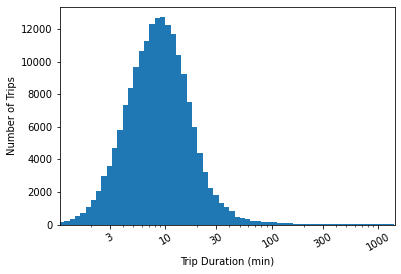

In [9]:
# Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(-1, 5+0.05, 0.05)

# Generate the x-ticks you want to apply
ticks = [1, 3 ,10, 30, 100, 300, 1000, 3000 , 10000, 30000 , 100000]
# Convert ticks into string values, to be display it along the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=Bike_df, x='duration_min', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')

# Apply x-ticks & small rotation
plt.xticks(ticks, labels ,rotation=30);

# Limiting the axes
plt.xlim(Bike_df['duration_min'].min(), Bike_df['duration_min'].max())


# Labeling the axes
plt.xlabel('Trip Duration (min)');
plt.ylabel('Number of Trips');

this is much better. seems that the duaration takes a normal ditribution curve with a peak around 9-10 min. which is the most common trip duaration among our users.

### let's look at the start and end stations . which is important for our analysis.

In [10]:
# each station and how many times was a starting point
Bike_df['start_station_name'].value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

> there are alot of stations and we can't plot all of them. the plot will be messy.
we will plot the first 10 stations and group others.

In [11]:
# here we will create a small df to plot
sorted_counts = Bike_df['start_station_name'].value_counts()[:10]

sorted_counts_other = Bike_df['start_station_name'].value_counts()[10:].sum()

sorted_counts['others'] = sorted_counts_other

sorted_counts_df = pd.DataFrame(sorted_counts)

sorted_counts_df

,start_station_name
Market St at 10th St,3904
San Francisco Caltrain Station 2 (Townsend St at 4th St),3544
Berry St at 4th St,3052
Montgomery St BART Station (Market St at 2nd St),2895
Powell St BART Station (Market St at 4th St),2760
San Francisco Ferry Building (Harry Bridges Plaza),2710
San Francisco Caltrain (Townsend St at 4th St),2703
Powell St BART Station (Market St at 5th St),2327
Howard St at Beale St,2293
Steuart St at Market St,2283


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


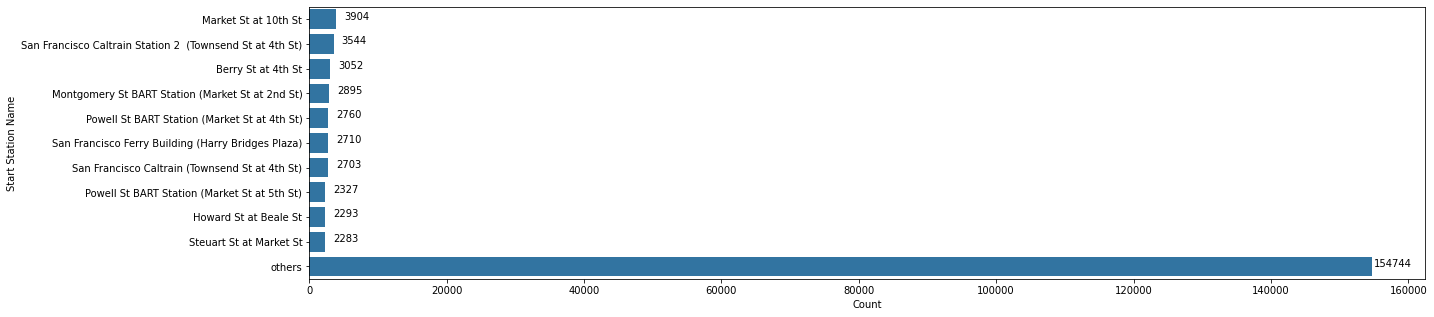

In [12]:
#Plotting

# Figure size
plt.figure(figsize = [20, 5]) 

# Return the Series having unique values
x = sorted_counts_df['start_station_name']

# Return the Series having frequency count of each unique value
y = sorted_counts_df.index

# standerd color
base_color = sb.color_palette()[0]

# Main Plot
sb.barplot(x, y, color = base_color)

# Labeling the axes
plt.xlabel('Count')
plt.ylabel('Start Station Name')

# Recalculating the type_counts just to have clarity.
type_counts = sorted_counts_df['start_station_name']

# get the current tick locations and labels
locs, labels = plt.yticks() 


# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    
    #to convert numbers to string
    pct_string = '{:}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(y = loc, x = count+3000, s=pct_string, ha = 'center', color = 'black')

In [13]:
# each station and how many times was an ending point
Bike_df['end_station_name'].value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
21st Ave at International Blvd                                  6
16th St Depot                                                   6
Willow St at Vine St                                            5
Name: end_station_name, Length: 329, dtype: int64

In [14]:
# here we will create a small df to plot
sorted_counts = Bike_df['end_station_name'].value_counts()[:10]

sorted_counts_other = Bike_df['end_station_name'].value_counts()[10:].sum()

sorted_counts['others'] = sorted_counts_other

sorted_counts_df = pd.DataFrame(sorted_counts)

sorted_counts_df

,end_station_name
San Francisco Caltrain Station 2 (Townsend St at 4th St),4857
Market St at 10th St,3973
Montgomery St BART Station (Market St at 2nd St),3647
San Francisco Ferry Building (Harry Bridges Plaza),3368
Powell St BART Station (Market St at 4th St),2997
San Francisco Caltrain (Townsend St at 4th St),2947
Berry St at 4th St,2872
The Embarcadero at Sansome St,2512
Powell St BART Station (Market St at 5th St),2353
Steuart St at Market St,2338


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


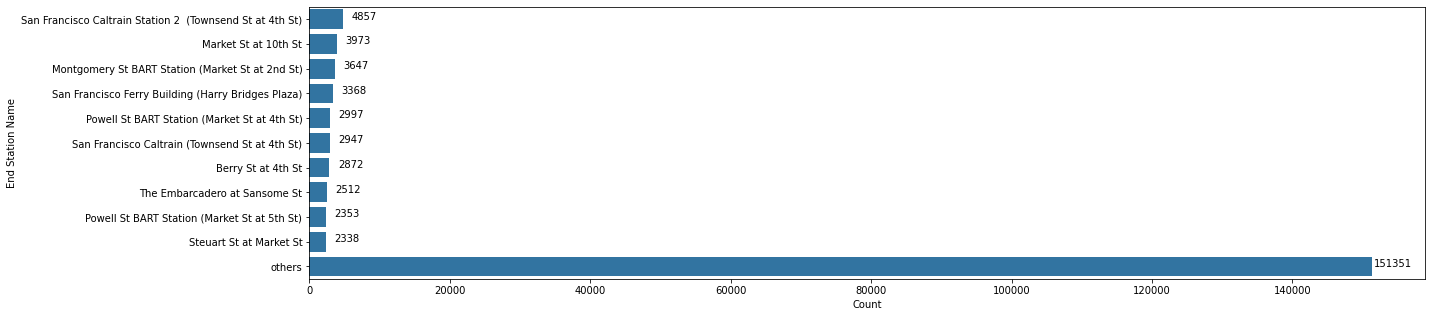

In [15]:
#Plotting

# Figure size
plt.figure(figsize = [20, 5]) 

# Return the Series having unique values
x = sorted_counts_df['end_station_name']

# Return the Series having frequency count of each unique value
y = sorted_counts_df.index

# standerd color
base_color = sb.color_palette()[0]

# Main Plot
sb.barplot(x, y, color = base_color)

# Labeling the axes
plt.xlabel('Count')
plt.ylabel('End Station Name')

# Recalculating the type_counts just to have clarity.
type_counts = sorted_counts_df['end_station_name']

# get the current tick locations and labels
locs, labels = plt.yticks() 


# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    
    #to convert numbers to string
    pct_string = '{:}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(y = loc, x = count+3000, s=pct_string, ha = 'center', color = 'black')

> From the previous two plots, it appears that some stations are frequently used as both starting and ending points of the trip.

> This can help the company to focus regular maintenance on these stations.

#### a look at the gender column

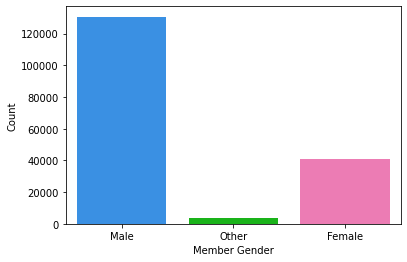

In [16]:
# Main Plot
sb.countplot(data=Bike_df, x='member_gender', palette =['#1E90FF','#00CD00','#FF69B4']);

# Labeling the axes
plt.xlabel('Member Gender')
plt.ylabel('Count');

> It's obvious that men uses bikes more than women in the bay area

#### a look at the user_type column

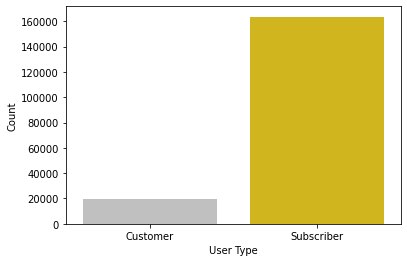

In [17]:
# Main Plot
sb.countplot(data=Bike_df, x='user_type' , palette =['#C0C0C0','#EEC900']);


# Labeling the axes
plt.xlabel('User Type')
plt.ylabel('Count');


> The Subscribers tend to be way more than Customers 

> This could be a good indication of the service. 

#### the member_birth_year column will give us an indication about the age of the users

In [18]:
# here I created a new column for age 
Bike_df['age'] = 2019 - Bike_df['member_birth_year'] 
Bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,35.0
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.683333,NaN
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000,47.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667,30.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667,45.0


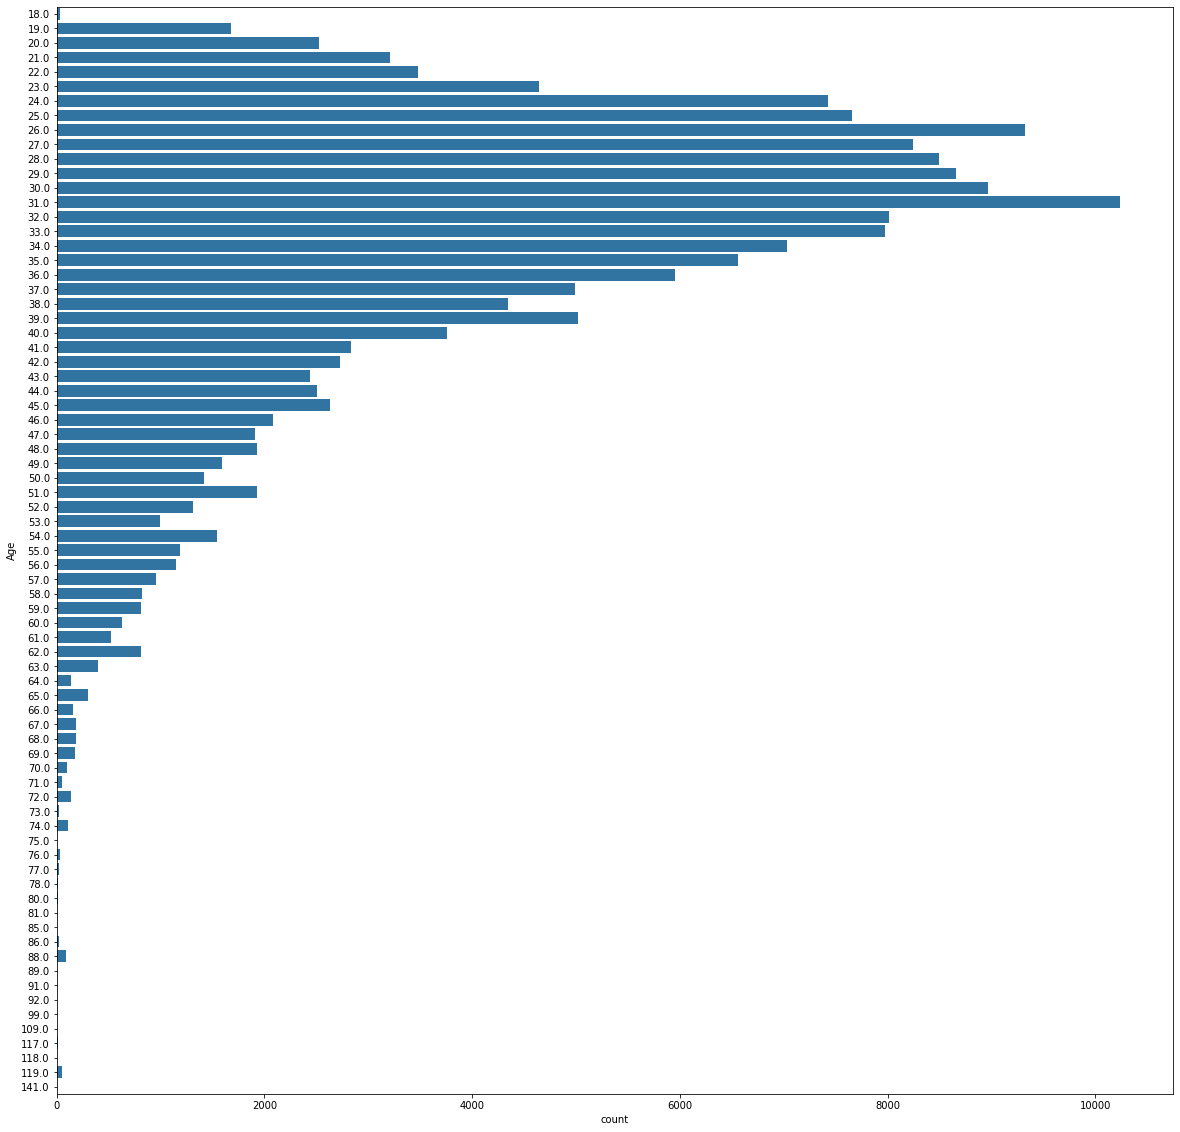

In [19]:
# I decided to make this plot as a bar chart so I could see the number for each age and not for each age group

plt.figure(figsize = [20, 20]) 

# Main Plot
sb.countplot(data=Bike_df, y='age' , color=base_color );

# Labeling the axes
plt.ylabel('Age');
plt.xlabel('count');

> There are some interesting points here 
> > 1- as expected,  people in '20s and '30s are the most common users 
> 
> > 2- no one uses the bike system below 18. this could be a restriction from the company itself.
> 
> > 3- there are some crazy ages and seem unrealistic (75 and above). this could be a typo error from the user.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> the distribution of Trip Duration was normal
> the distribution of user age was right-skewed

> there were unusual points in the user age column (above 75)

>i've transformed the x-axis in the Trip Duration plot into log scale so it became more clear to see

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> the distributions of the start and end stations. due to the large number of stations, I plotted the top 10 stations and combined the rest of them in the 'others' bar by creating an alternative df that holds the values to be plotted. 

> the 'others' bar was so big which could mean that there are no stations is extremely crowded than others.  

## Bivariate Exploration

In [20]:
Bike_df['start_hour'] = Bike_df['start_time'].str[11:13]
Bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age,start_hour
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,35.0,17
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.683333,NaN,18
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000,47.0,12
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667,30.0,17
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667,45.0,23


#### The relation between Trip Duaration and Gender

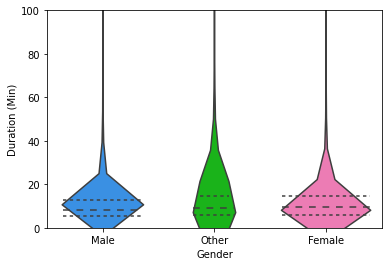

In [21]:
# Main Plot
sb.violinplot(data=Bike_df, x='member_gender', y='duration_min', palette =['#1E90FF','#00CD00','#FF69B4'], inner='quartile')


plt.ylim(0, 100)


# Labeling the axes
plt.xlabel('Gender')
plt.ylabel('Duration (Min)');

> seems that the median time of women is higer than the median time of men (women make longer trips) but this difference is not so big. and both genders have almost the same mode.

#### The relation between Trip Duaration and User type

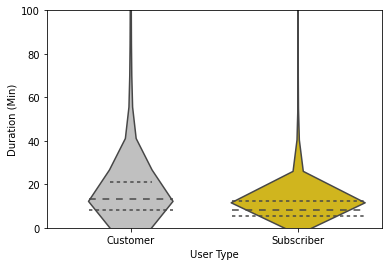

In [22]:
# Main Plot
sb.violinplot(data=Bike_df, x='user_type', y='duration_min', palette =['#C0C0C0','#EEC900'], inner='quartile')


plt.ylim(0, 100)


# Labeling the axes
plt.xlabel('User Type')
plt.ylabel('Duration (Min)');

> the subscribers' distribution is wider at short trips, which means that they use it periodically and for the same specific trips (that's why they subscribe to the service)

#### The relation between Trip Duaration and Days

In [23]:
Bike_df.start_time.describe()

count                       183412
unique                      183401
top       2019-02-06 21:35:57.5740
freq                             2
Name: start_time, dtype: object

In [24]:
# Get the day of month from the starting and ending times


Bike_df['start_time'] = pd.to_datetime(Bike_df['start_time'])
Bike_df['end_time'] = pd.to_datetime(Bike_df['end_time'])

Bike_df['start_day_week'] = Bike_df['start_time'].dt.strftime('%A')
Bike_df['end_day_week'] = Bike_df['end_time'].dt.strftime('%A')

Bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age,start_hour,start_day_week,end_day_week
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,869.750000,35.0,17,Thursday,Friday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,708.683333,NaN,18,Thursday,Friday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,1030.900000,47.0,12,Thursday,Friday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,608.166667,30.0,17,Thursday,Friday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,26.416667,45.0,23,Thursday,Friday


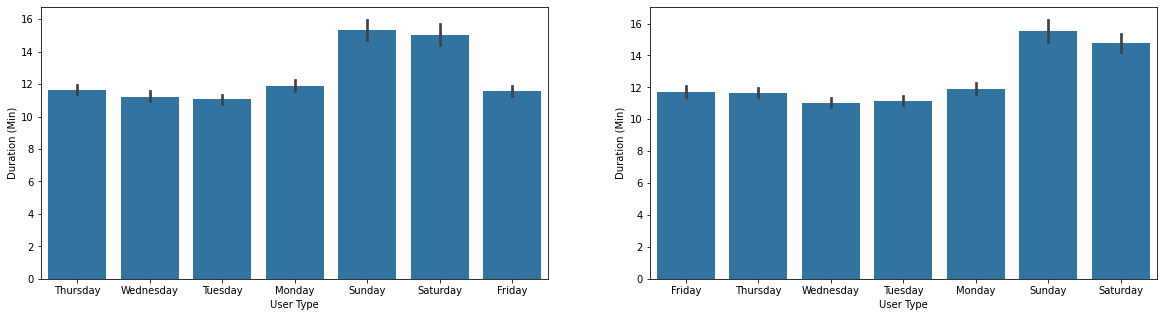

In [25]:
# Here we will make a bar plot to comape the days to the total duration

plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)

# Main Plot
sb.barplot(data = Bike_df, x = 'start_day_week', y = 'duration_min' , color=base_color);

# Labeling the axes
plt.xlabel('User Type')
plt.ylabel('Duration (Min)');


plt.subplot(1, 2, 2)

# Main Plot
sb.barplot(data = Bike_df, x = 'end_day_week', y = 'duration_min' , color=base_color);

# Labeling the axes
plt.xlabel('User Type')
plt.ylabel('Duration (Min)');

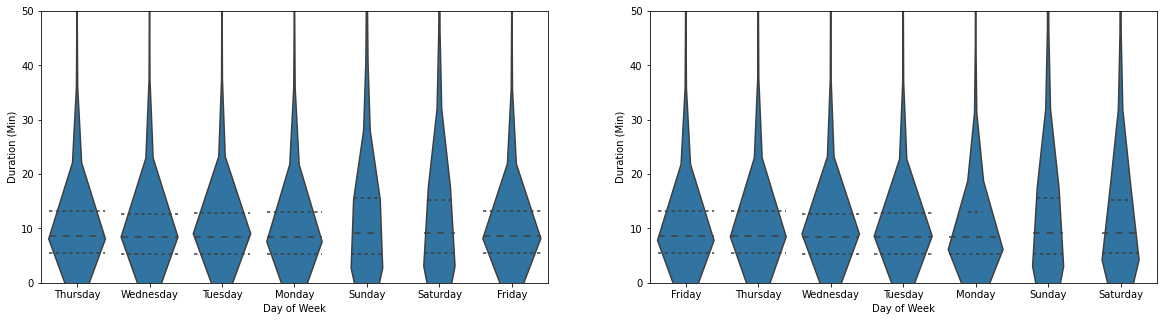

In [26]:
# Here we will make a bar plot to comape the days to the distribution of trip duration

plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)

# Main Plot
sb.violinplot(data = Bike_df, x = 'start_day_week', y = 'duration_min' , color=base_color , inner='quartile');

plt.ylim(0, 50)


# Labeling the axes
plt.xlabel('Day of Week')
plt.ylabel('Duration (Min)');


plt.subplot(1, 2, 2)

# Main Plot
sb.violinplot(data = Bike_df, x = 'end_day_week', y = 'duration_min' , color=base_color , inner='quartile');

plt.ylim(0, 50)

# Labeling the axes
plt.xlabel('Day of Week')
plt.ylabel('Duration (Min)');

> In the US, weekend off days are saturaday and sunday. that is why these two days have 
>
> 1- bigger total duration
>
> 2- narrower plots at short trips (they don't go to work)
>
> 3- wider plots at longer trips (some people may take the bikes on a long trip in the bay)

#### The relation between Gender and Days

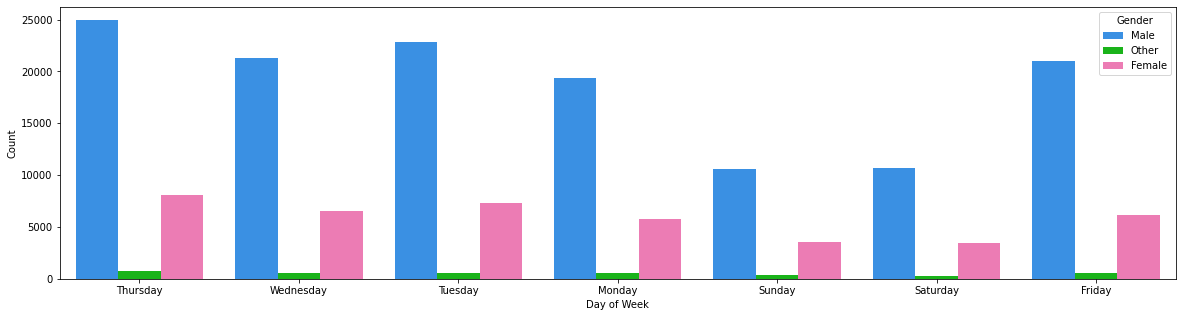

In [27]:
plt.figure(figsize = [20, 5])

# Main Plot
sb.countplot(data = Bike_df, hue = 'member_gender', x = 'start_day_week' , palette =['#1E90FF','#00CD00','#FF69B4']);

# Legend Title
plt.legend(title='Gender')

# Labeling the axes
plt.xlabel('Day of Week')
plt.ylabel('Count');

> In the US, weekend off days are saturaday and sunday.

> Seems that the decrese in trip counts for men is much bigger than the decrese for women. 
>
> this could mean that the men workers in the bay area are mor than women 

#### The relation between User Type and Days

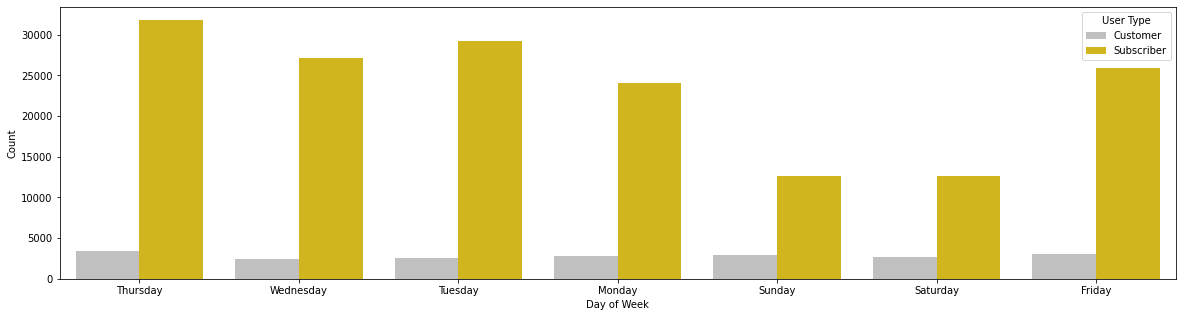

In [28]:
plt.figure(figsize = [20, 5])

# Main Plot
sb.countplot(data = Bike_df, hue = 'user_type', x = 'start_day_week' , palette =['#C0C0C0','#EEC900']);

# Legend Title
plt.legend(title='User Type')

# Labeling the axes
plt.xlabel('Day of Week')
plt.ylabel('Count');

> In the US, weekend off days are saturaday and sunday.

> Here we see that the decrease in weekend days happens for the subscribers only (because they use bikes to go to their jobs) 
>
> while customers count of trips didn't change throughout the weekdays

#### The relation between User Type and Gender

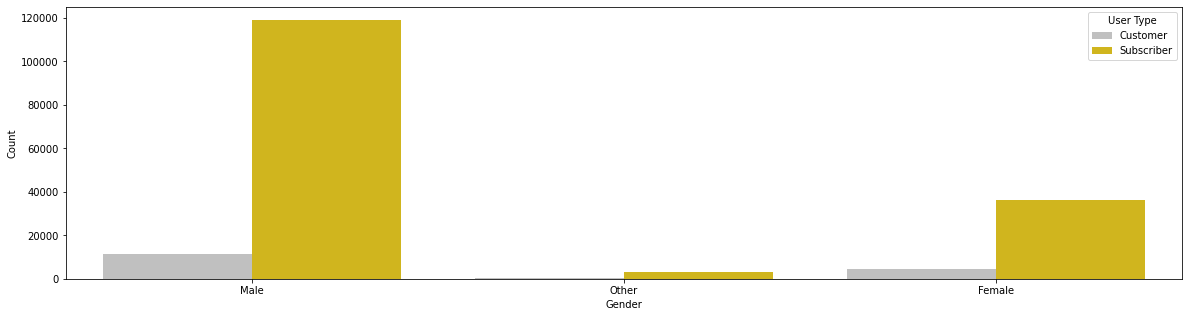

In [29]:
plt.figure(figsize = [20, 5])

# Main Plot
sb.countplot(data = Bike_df, hue = 'user_type', x = 'member_gender' , palette =['#C0C0C0','#EEC900']);

# Legend Title
plt.legend(title='User Type')
           
# Labeling the axes
plt.xlabel('Gender')
plt.ylabel('Count');

> No surprise, the males are  more than females in both user types

#### The relation between Gender and Age

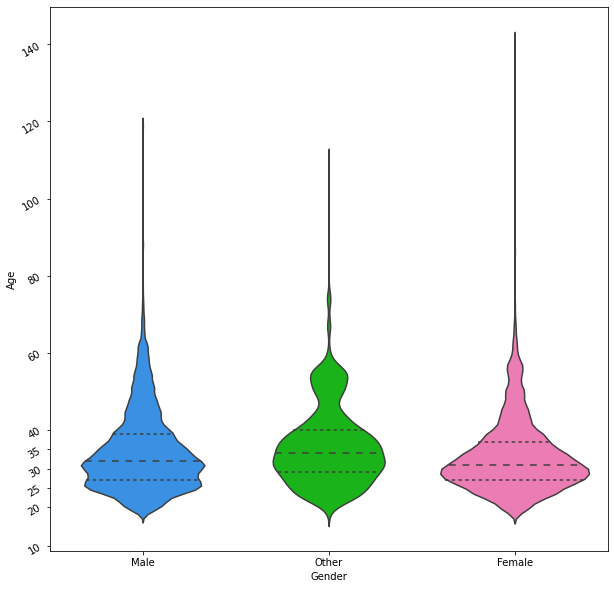

In [30]:
plt.figure(figsize = [10, 10])

# Main Plot
sb.violinplot(data = Bike_df, x = 'member_gender', y = 'age' , palette =['#1E90FF','#00CD00','#FF69B4'] , inner='quartile');

# Generate the x-ticks you want to apply
ticks = [10, 20, 25, 30, 35, 40 , 60, 80 , 100 , 120 , 140]

# Convert ticks into string values, to be display it along the x-axis
labels = ['{}'.format(v) for v in ticks]

# Apply x-ticks & small rotation
plt.yticks(ticks, labels ,rotation=30);


# Labeling the axes
plt.xlabel('Gender')
plt.ylabel('Age');

> This is interisting.
>
> the women plot have only one peak (wide area) at age = 29
>
> while men plot has 2 peaks, at age = 25 , 31 


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We've disscussed alot of importanit relations and we found that the duaration of trips varies with the user type and Gender and also the days have an important factor when it coes to the weekends

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yup, the relation between age and gender was interesting

## Multivariate Exploration

#### The relation between Gender,  Age and Trip duration

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


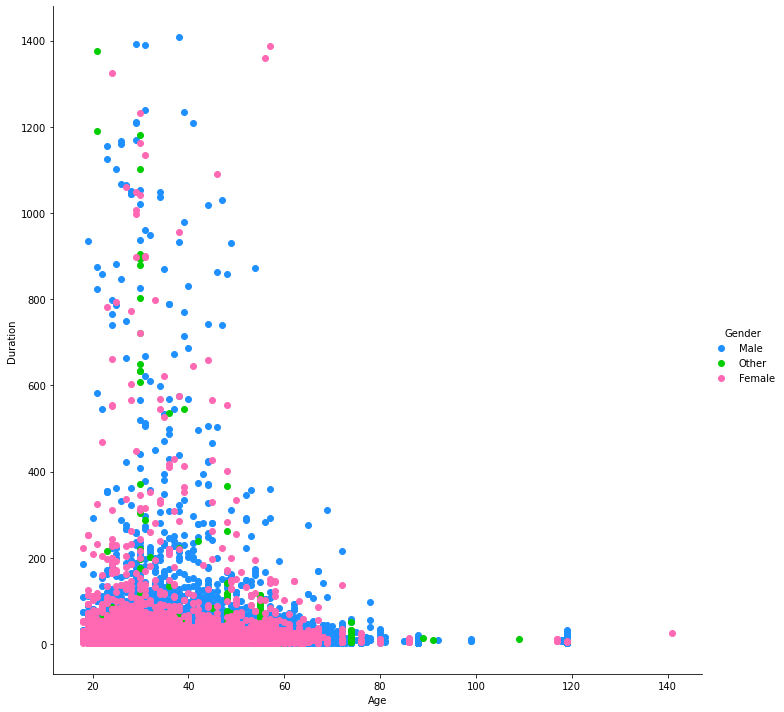

In [31]:
g = sb.FacetGrid(data = Bike_df, hue = 'member_gender', size = 10 , palette =['#1E90FF','#00CD00','#FF69B4'] )
g.map(plt.scatter, 'age', 'duration_min')
g.add_legend(title='Gender')


# Labeling the axes
plt.xlabel('Age')
plt.ylabel('Duration');

> Regardless of the messy part in the left lower corner, if we looked at the part with a duration higher than 400 min, most of the points are blue (men). we can also notice few green dots aligned at age = 30

#### The relation between Hour,  Day of Week and User Type

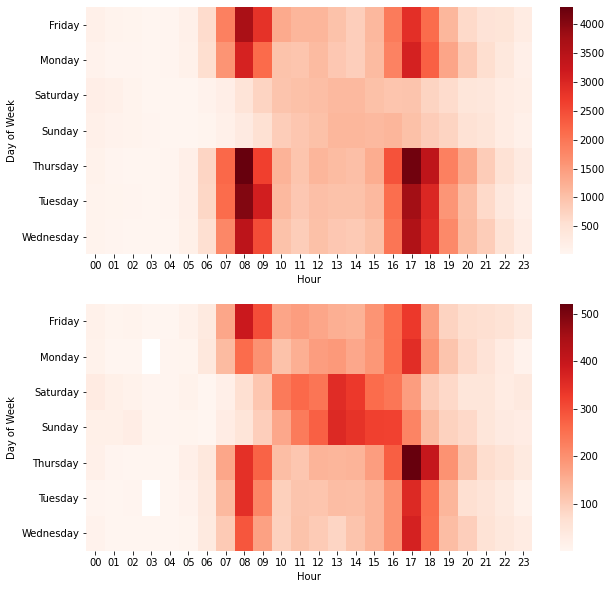

In [32]:
plt.figure(figsize = [10, 10])

# Subscribers
plt.subplot(2,1,1)
Bike_df_subs = Bike_df[Bike_df['user_type'] == 'Subscriber']
ct_counts_subs = Bike_df_subs.groupby(['start_day_week', 'start_hour']).size()
ct_counts_subs = ct_counts_subs.reset_index(name = 'count')
ct_counts_subs = ct_counts_subs.pivot(index = 'start_day_week', columns = 'start_hour', values = 'count')
sb.heatmap(ct_counts_subs , cmap = "Reds")

# Labeling the axes
plt.xlabel('Hour')
plt.ylabel('Day of Week');



# Customers
plt.subplot(2,1,2)
Bike_df_custs = Bike_df[Bike_df['user_type'] == 'Customer']
ct_counts_custs = Bike_df_custs.groupby(['start_day_week', 'start_hour']).size()
ct_counts_custs = ct_counts_custs.reset_index(name = 'count')
ct_counts_custs = ct_counts_custs.pivot(index = 'start_day_week', columns = 'start_hour', values = 'count')
sb.heatmap(ct_counts_custs , cmap = "Reds")

# Labeling the axes
plt.xlabel('Hour')
plt.ylabel('Day of Week');



> Here we can see a full Idea about the difference between each user type and how they behave 

> Subscribers:
>
> in workdays: they go to work at 08:00 and back from work at 17:00
>
> on weekends: they mostly don't use the bikes these days at all

> Customers: 
>
> in workdays: similar to the subscribers but a lower density because bikes are not their main way of transportation (if so, they will subscribe)
>
> on weekends: they use the bikes in the afternoon in a significant density  

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> in this part we visualized two important relationships. one is how duration is affected by users characteristics (age and gender) and two we saw how each user type behave differently in the timeline hor hours and weeks

> this indeed gave us a clear look at the relations between variables and the behaviors of the users. 

> ex: young men use the bike system for long trips. and people who subscribed to the service for daily usage tend to not use it on weekends
### Were there any interesting or surprising interactions between features?

> Yup, the person in his '30s who identify himself as gender 'others' and uses the system for long trips.
